In [3]:
import sys
sys.path.insert(0, '../utils')
from helper import load_chroma, word_wrap, project_embeddings
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

chroma_collection = load_chroma(filename='../Evaluation Sets/Raptor Contract.docx', collection_name='contract', embedding_function=embedding_function)
chroma_collection.count()

UniqueConstraintError: Collection contract already exists

In [4]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/home/mahbubah/Desktop/week-11/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [5]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 650/650 [11:17<00:00,  1.04s/it]


(3.6664303064346315, 11.382964777946473, 4.034906935691834, 11.528777050971986)

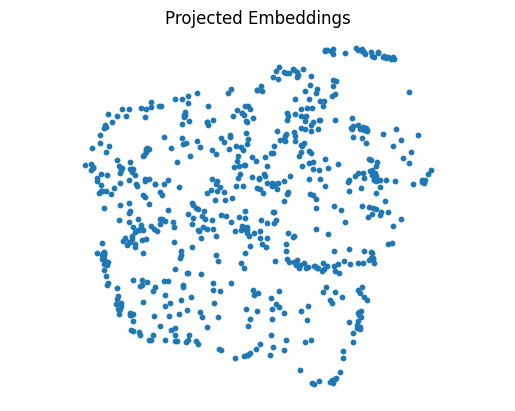

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [7]:
query = "What is the purpose of the escrow?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

escrow.

this agreement, the escrow agreement or the contemplated transactions ;

“ escrow amount ” means, $ 1, 000, 000 “ facilities ” means any
buildings, plants, improvements or structures located on the real
property.

at the closing, buyer shall deposit the escrow amount with the escrow
agent to be held in a separate account ( the “ escrow account ” ). the
escrow account shall be governed by the terms of the escrow agreement.
all funds contained in the escrow account shall be held in escrow and
shall be available solely for the purpose of satisfying obligations of
the company securityholders, if any, as provided in section 2. 07 ( f
). closing deliveries.

to the sellers ’ representative, the employment agreements and any
other ancillary agreements to be entered into by buyer or parent at
closing, executed by buyer or parent ( as applicable ) ; to the escrow
agent, by wire transfer of immediately available funds, the escrow
amount ;



In [8]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


(3.6664303064346315, 11.382964777946473, 4.034906935691834, 11.528777050971986)

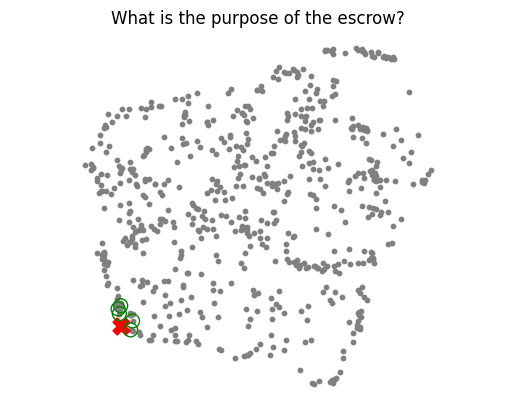

In [9]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [10]:
query = "Are Change of Control Payments considered a Seller Transaction Expense?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

“ seller transaction expenses ” means all costs, fees and expenses
incurred by any acquired company or any seller in connection with the
negotiation, execution and delivery of this agreement and the ancillary
agreements or the consummation of the contemplated transactions, to the
extent such costs, fees and expenses are payable by the buyer at
closing or payable or reimbursable by any acquired company after the
closing, and any applicable non - recoverable vat, including, ( a ) ( i
) all fees and

expenses payable to the company ’ s financial advisor ( s ) and all
other brokerage fees, commissions, finders ’ fees or financial advisory
fees so incurred, ( ii ) the fees and expenses of the company ’ s legal
counsel, accountants, consultants and other experts and advisors so
incurred and ( iii ) all change of control payments ; ( b ) any fees
and expenses owing to the company ’ s affiliates ( other than to
another acquired company ) or to any seller ( in each case, whether or
not arising 

In [11]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


(3.6664303064346315, 11.382964777946473, 4.034906935691834, 11.528777050971986)

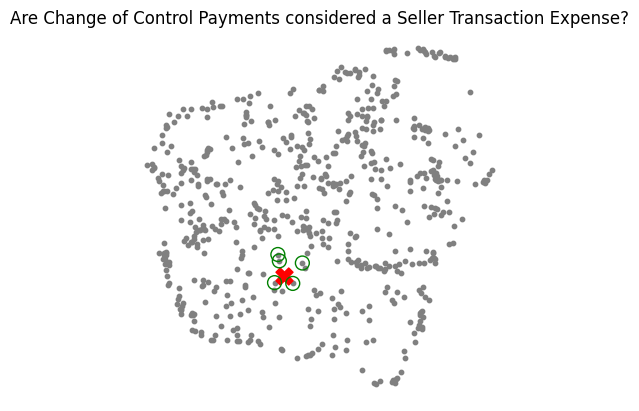

In [12]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [13]:
query = "Whose consent is required for the assignment of the Agreement by the Buyer?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

perform its obligations hereunder, in each case, so long as the buyer
is not relieved of any liability or obligations hereunder and ( b ) the
buyer may assign this agreement and any or all of its rights and
interest hereunder to any purchaser of all or substantially all its
assets or designate such purchaser to perform its obligations hereunder

. no party may assign, delegate or otherwise transfer either this
agreement or any of its rights, interests or obligations hereunder
without the prior written approval of the other parties ( with the
sellers ’ representative acting for all of the sellers ), and any
attempt to do so will be null and void ab initio ; provided, that ( a )
the buyer may assign this agreement and any or all of its rights and
interests hereunder to one or more of its affiliates or designate one
or more of its affiliates to

. this agreement and each ancillary agreement to which the buyer is a
party ( a ) have been duly executed and delivered by the buyer and ( b
) is

In [14]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


(3.6664303064346315, 11.382964777946473, 4.034906935691834, 11.528777050971986)

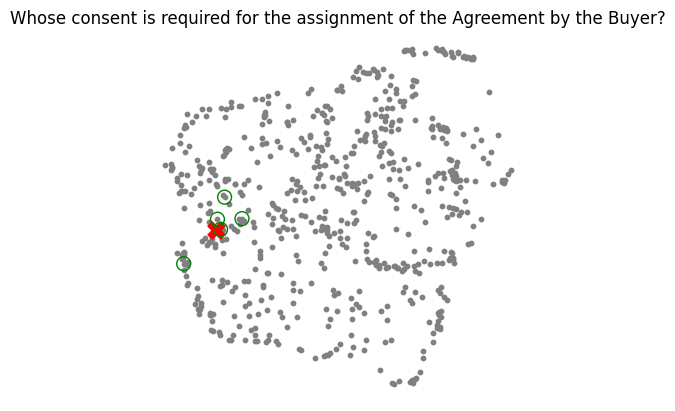

In [15]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

test with unrelated query

In [16]:
query = "What has Michael Jordan done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

publicity

assets.

( including stock appreciation, phantom stock, profit participation or
other similar rights ).

recitals

notwithstanding anything to the contrary in this agreement, with
respect to holders of options who are individuals and are not israeli
residents for israeli tax purposes, who were granted such awards in
consideration solely for work or services performed entirely outside of
israel ( and who will provide buyer and paying agent, prior to any
payment to them, no later than three business days before such payment
is due, with a validly executed declaration in the form attached hereto
as exhibit [ ● ]



In [17]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


(3.6664303064346315, 11.382964777946473, 4.034906935691834, 11.528777050971986)

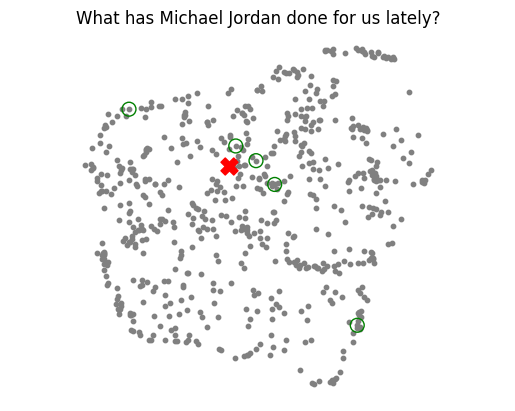

In [18]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')